# Bank Account Fraud Detection - Undersampling Analysis

In [16]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

**Read Data**

In [17]:
# import data
data = pd.read_csv('../data/raw/raw_data.csv')
print(f"data shape: {data.shape}")
data.head()

data shape: (1000000, 32)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


## Data Cleaning

1. Deal with Missing Values
2. Deal with categorical and numerical data
3. Drop useless columns (`device_fraud_count`)

In [18]:
# missing values
# change all negative values to -1 for intended_balcon_amount
data['intended_balcon_amount'] = data['intended_balcon_amount'].apply(lambda x: -1 if x < 0 else x)

# for rows with values < 0 in 'current_address_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w', drop them
data = data[(data['current_address_months_count'] >= 0) & (data['session_length_in_minutes'] >= 0) & (data['device_distinct_emails_8w'] >= 0)]

In [19]:
# define categorical, change to 'category'
categorical_columns = ['fraud_bool', 'payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'source', 'device_os', 'keep_alive_session']

# change datatype of categorical columns to 'category'
data[categorical_columns] = data[categorical_columns].astype('category')

# define numerical columns
numerical_columns = [col for col in data.columns if col not in categorical_columns]

# change datatype of categorical columns to 'category'
data[categorical_columns] = data[categorical_columns].astype('category')

In [20]:
# drop columns
columns_to_drop = ['velocity_4w', 'device_fraud_count']
data = data.drop(columns=columns_to_drop)

In [21]:
# check shape and head of data
print(f"data shape: {data.shape}")
data.head()

data shape: (993607, 30)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0
1,0,0.8,0.617426,-1,89,20,0.010095,-1.000000,AD,1658,...,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.000000,AB,1095,...,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.000000,AB,3483,...,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,26,0,200.0,0,INTERNET,3.743048,other,0,1,0


## Undersample data ratio 1:1

In [22]:
# undersample data 1:1
data_fraud = data[data['fraud_bool'] == 1]
data_non_fraud = data[data['fraud_bool'] == 0].sample(n=len(data_fraud), random_state=42)

# combine data & shuffle
data = pd.concat([data_fraud, data_non_fraud])
data = data.sample(frac=1, random_state=42)

# check data
print(f'data shape: {data.shape}')
data.head()

data shape: (21990, 30)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
864804,0,0.9,0.866014,-1,36,30,0.031627,-1.0,AB,1574,...,1,0,500.0,0,INTERNET,6.276312,windows,1,1,6
437970,1,0.8,0.086308,-1,367,40,0.016527,-1.0,AD,2735,...,25,0,1500.0,0,INTERNET,1.324133,windows,1,1,3
674822,0,0.8,0.951951,-1,42,40,0.012414,-1.0,AC,523,...,-1,0,200.0,0,INTERNET,2.127188,windows,1,1,4
219585,0,0.8,0.520533,-1,163,20,0.002347,-1.0,AC,512,...,-1,0,200.0,0,INTERNET,1.087518,linux,1,1,1
109381,0,0.2,0.910679,-1,21,20,0.011624,-1.0,AD,4946,...,15,0,200.0,0,INTERNET,2.632743,other,0,1,0


## EDA Bank Activity and Device Activity

**Hypothesis: Fraudulent Bank Accounts have unique characteristics in relation to how their device activity.**
* More likely to use a phone that has more lax security i.e. windows
* More likely to have more than 1 email in each device. --> more emails to create more fake accounts
* If a phone has more than 1 email from each device, then it keep_alive_session likely to be false (i.e. value=0) --> convienience on fraudster's end. troublesome to log in and out continually.
* Session length will also be short??

**Columns considered**

* Device Activity:
    * `session_length_in_minutes`
    * `device_os`
    * `keep_alive_session`
    * `device_distinct_emails_8w`
    * `source`
    * `foreign_request`

* Bank Activity:
    * `zip_count_4w`
    * `velocity_6h`
    * `velocity_24h`
    * `velocity_4w`
    * `bank_branch_count_8w`
    * `date_of_birth_distinct_emails_4w`


In [25]:
# select columns related to device activity
device_activity  = ['fraud_bool', 'session_length_in_minutes', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'source', 'foreign_request']
device_activity_df = data[device_activity]

# print shape
device_activity_df.shape
device_activity_df.head()

,fraud_bool,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,source,foreign_request
864804,0,6.276312,windows,1,1,INTERNET,0
437970,1,1.324133,windows,1,1,INTERNET,0
674822,0,2.127188,windows,1,1,INTERNET,0
219585,0,1.087518,linux,1,1,INTERNET,0
109381,0,2.632743,other,0,1,INTERNET,0


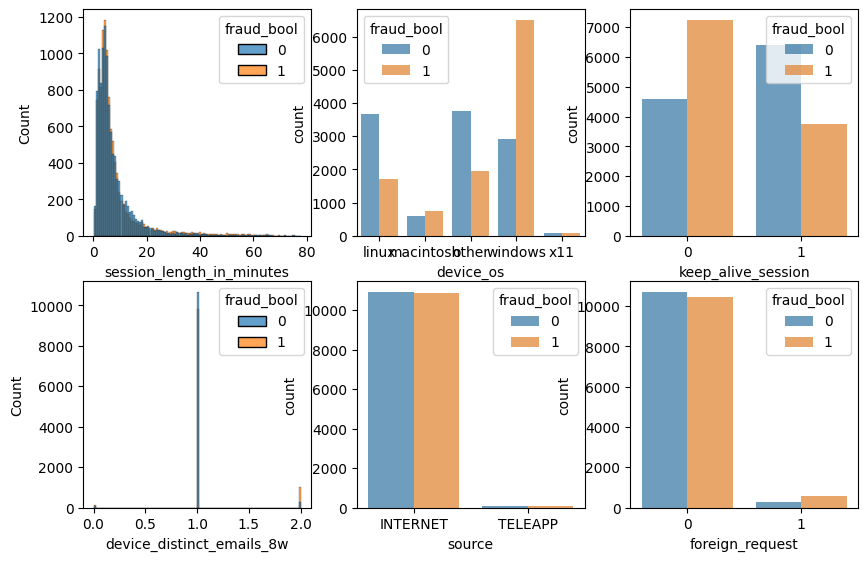

In [24]:
# for each column, if it is categorical, plot the value counts, if it is numerical, plot histogram
# put in a 3 x 3 grid, and color code the fraud_bool column
# print all except the first column
plt.figure(figsize=(10, 10))
for i, col in enumerate(device_activity_df.columns[1:]):
    plt.subplot(3, 3, i+1)
    if device_activity_df[col].dtype.name == 'category':
        sns.countplot(data=device_activity_df, x=col, hue='fraud_bool', alpha=0.7)
    else:
        sns.histplot(data=device_activity_df, x=col, hue='fraud_bool', bins=100, alpha=0.7)

In [ ]:
# import DBSCAN from sklearn
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [ ]:
# prep data
nomial_categorical_columns = ['device_os', 'device_distinct_emails_8w', 'source', 'keep_alive_session', 'foreign_request']
device_activity_df = pd.get_dummies(device_activity_df, columns=nomial_categorical_columns)
device_activity_without_fraud_col = device_activity_df.drop(columns=['fraud_bool'])
fraud_col = device_activity_df['fraud_bool']

# print shape
print(f'device_activity_without_fraud_col shape: {device_activity_without_fraud_col.shape}')
device_activity_without_fraud_col.head()

In [ ]:
# fit DBSCAN basic first
dbscan = DBSCAN(eps=0.5, min_samples=17)
dbscan.fit(device_activity_without_fraud_col)

labels = dbscan.labels_
# add labels to dataset
device_activity_without_fraud_col['DBSCAN_labels'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
device_activity_without_fraud_col['DBSCAN_labels'].value_counts()

In [ ]:
device_activity_without_fraud_col.head()

In [ ]:
# plot
plt.figure(figsize=(10,10))
plt.scatter(device_activity_without_fraud_col.iloc[:, 0],device_activity_without_fraud_col.iloc[:, 1],
            c=device_activity_without_fraud_col['DBSCAN_labels'],
            s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

#### DBSCAN on features deemed important so far

In [ ]:
# important features
important_features = ['credit_risk_score', 'name_email_similarity', 'device_os', 'housing_status', 'proposed_credit_limit', 'has_other_cards', 'phone_home_valid',
                      'prev_address_months_count', 'intended_balcon_amount',
                      'keep_alive_session']

# select important features
impt_data = data[important_features]

# check shape
print(f'impt_data shape: {impt_data.shape}')
impt_data.head()

In [ ]:
categorical_columns = ['device_os', 'housing_status', 'has_other_cards', 'phone_home_valid', 'keep_alive_session']
numerical_columns = [col for col in impt_data.columns if col not in categorical_columns]

# standardize numerical columns
scaler = StandardScaler()
impt_data[numerical_columns] = scaler.fit_transform(impt_data[numerical_columns])

# one-hot encode categorical columns
impt_data = pd.get_dummies(impt_data, columns=categorical_columns)

# check shape
print(f'impt_data shape: {impt_data.shape}')
impt_data.head()

In [ ]:
# fit DBSCAN basic first
dbscan = DBSCAN(eps=0.5, min_samples=24)
dbscan.fit(impt_data)

labels = dbscan.labels_
# add labels to dataset
impt_data['DBSCAN_labels'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

In [ ]:
# check impt_data
impt_data.head()

In [ ]:
# create fraud column
fraud_col = data['fraud_bool']

# combine impt_data and fraud_col store in another df
impt_data_w_fraud = pd.concat([impt_data, fraud_col], axis=1)

# check shape
print(f'impt_data_w_fraud shape: {impt_data_w_fraud.shape}')
impt_data_w_fraud.head()

In [ ]:
# plot such that all the datapoints are grey
# using the fraud_col, color code the datapoints on the same plot as the DBSCAN, where fraud is red and non-fraud is grey
plt.figure(figsize=(10,10))
plt.scatter(impt_data.iloc[:, 1],impt_data.iloc[:, 2],
            c=impt_data_w_fraud['fraud_bool'],
            s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [ ]:
# select value of epison from K-distance graph
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(impt_data)
distances, indices = nbrs.kneighbors(impt_data)

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

#### Generate impt_data again

In [ ]:
# generate impt_data again
impt_data = data[important_features]

categorical_columns = ['device_os', 'housing_status', 'has_other_cards', 'phone_home_valid', 'keep_alive_session']
numerical_columns = [col for col in impt_data.columns if col not in categorical_columns]

# standardize numerical columns
scaler = StandardScaler()
impt_data[numerical_columns] = scaler.fit_transform(impt_data[numerical_columns])

# one-hot encode categorical columns
impt_data = pd.get_dummies(impt_data, columns=categorical_columns)

# check shape
print(f'impt_data shape: {impt_data.shape}')
impt_data.head()

In [ ]:
# fit DBSCAN eps=1.5 first
dbscan = DBSCAN(eps=1.5, min_samples=24)
dbscan.fit(impt_data)

labels = dbscan.labels_
# add labels to dataset
impt_data['DBSCAN_labels'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

In [ ]:
# create fraud column
fraud_col = data['fraud_bool']

# combine impt_data and fraud_col store in another df
impt_data_w_fraud = pd.concat([impt_data, fraud_col], axis=1)

# create colors
colors = np.where(impt_data_w_fraud['fraud_bool'] == 1, 'red', 'grey')

# check shape
print(f'impt_data_w_fraud shape: {impt_data_w_fraud.shape}')
impt_data_w_fraud.head()

In [ ]:
impt_data_w_fraud.columns

In [ ]:
# plot such that all the datapoints are grey
# using the fraud_col, color code the datapoints according to labels of DBSCAN
plt.figure(figsize=(10,10))
plt.scatter(impt_data.iloc[:, 0],impt_data.iloc[:, 1],
            c=impt_data['DBSCAN_labels'],
            s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [ ]:
# plot such that all the datapoints are grey
# using the fraud_col, color code the datapoints on the same plot as the DBSCAN, where fraud is red and non-fraud is grey

# columns 8 and 21 are 'device_os_windows' and 'keep_alive_session_0'
# columns 1 and 2 are 'name_email_similarity' and 'proposed_credit_limit'
plt.figure(figsize=(10,10))
# Plot original data with jitter
plt.scatter(impt_data.iloc[:, 1],impt_data.iloc[:, 2], label='Original Data', alpha=0.5, edgecolor='none')

# jitter the points
jitter_amount = 0.01
feature1 = impt_data.iloc[:, 1] + np.random.normal(0, jitter_amount, len(impt_data))
feature2 = impt_data.iloc[:, 2] + np.random.normal(0, jitter_amount, len(impt_data))

plt.scatter(feature1,feature2,
            c=colors,
            s=15)
plt.title('DBSCAN Clustering (with jittering)',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [ ]:
# count values of labels
impt_data['DBSCAN_labels'].value_counts()

In [ ]:
# group by 'DBSCAN_labels' and 'fraud_bool' and count
impt_data_w_fraud.groupby(['DBSCAN_labels', 'fraud_bool']).size()

In [ ]:
# split session_length_in_minutes into 2 groups, fraud and non-fraud
session_length_fraud = device_activity_df[device_activity_df['fraud_bool'] == 1][['session_length_in_minutes', 'fraud_bool']]
sessions_length_non_fraud = device_activity_df[device_activity_df['fraud_bool'] == 0][['session_length_in_minutes', 'fraud_bool']]

# print shapes
print(f"fraud shape: {session_length_fraud.shape}")
print(f"non-fraud shape: {sessions_length_non_fraud.shape}")

In [ ]:
# plot boxplot for non-fraud session length in minutes
# plot side by side, with different colors, on columns 'session_length_in_minutes'
plt.figure(figsize=(6, 3))
sns.boxplot(data=session_length_fraud, x='session_length_in_minutes', color='red')

In [ ]:
# plot boxplot for non-fraud session length in minutes
plt.figure(figsize=(6, 3))
sns.boxplot(data=sessions_length_non_fraud, x='session_length_in_minutes', color='blue')

In [ ]:
device_activity_df.columns

In [ ]:
# select columns related to device activity
device_activity  = ['fraud_bool', 'session_length_in_minutes', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'source', 'foreign_request']
device_activity_df = data[device_activity]

In [ ]:
# check value_counts for device_distinct_emails_8w
device_activity_df['device_distinct_emails_8w'].value_counts()

In [ ]:
# select device_distinct_emails_8w and fraud_bool columns, and select all the frauds
device_distinct_emails_fraud = device_activity_df[device_activity_df['fraud_bool'] == 1][['device_distinct_emails_8w', 'fraud_bool']]
device_distinct_emails_non_fraud = device_activity_df[device_activity_df['fraud_bool'] == 0][['device_distinct_emails_8w', 'fraud_bool']]

# plot count plot for both fraud and non-fraud, in 1 x 2 grid, provide title for each
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=device_distinct_emails_fraud, x='device_distinct_emails_8w', hue='fraud_bool')
plt.title('Fraud')
plt.subplot(1, 2, 2)
sns.countplot(data=device_distinct_emails_non_fraud, x='device_distinct_emails_8w', hue='fraud_bool')
plt.title('Non-Fraud')


In [ ]:
# use the device_activity_df, combine the device_os and keep_alive_sessions columns
# change device_os and keep_alive_session to str
device_activity_df['device_os'] = device_activity_df['device_os'].astype(str)
device_activity_df['keep_alive_session'] = device_activity_df['keep_alive_session'].astype(str)
device_activity_df['device_os_keep_alive'] = device_activity_df['device_os'] + '_' + device_activity_df['keep_alive_session']

# plot countplot for device_os_keep_alive
plt.figure(figsize=(12, 6))
sns.countplot(data=device_activity_df, x='device_os_keep_alive', hue='fraud_bool')

In [ ]:
# convert device_activity_df['fraud_bool'] to 1 and 0
device_activity_df['fraud_bool'] = device_activity_df['fraud_bool'].astype(int)

# group by device_os_keep_alive
# within each group, find the 2 proportions - proportion of frauds, i.e. number of fraud/total, and proportion of non-frauds, i.e. number of non-frauds/total
device_os_keep_alive_grouped = device_activity_df.groupby('device_os_keep_alive')

# iterate through each group, create a dataframe where the row corresponds to the group, and the columns are 'fraud_proportion' and 'non_fraud_proportion'
fraud_proportion = []
non_fraud_proportion = []
for name, group in device_os_keep_alive_grouped:
    fraud_proportion.append(group['fraud_bool'].sum()/len(group))
    non_fraud_proportion.append((len(group) - group['fraud_bool'].sum())/len(group))

# create a dataframe
fraud_non_fraud_proportion_df = pd.DataFrame({'device_os_keep_alive': device_os_keep_alive_grouped.groups.keys(), 'fraud_proportion': fraud_proportion, 'non_fraud_proportion': non_fraud_proportion})
fraud_non_fraud_proportion_df.head()

# plot in such that it is a barplot, but the bars are stacked
plt.figure(figsize=(12, 6))
plt.bar(fraud_non_fraud_proportion_df['device_os_keep_alive'], fraud_non_fraud_proportion_df['non_fraud_proportion'], bottom=fraud_non_fraud_proportion_df['fraud_proportion'], label='non-fraud')
plt.bar(fraud_non_fraud_proportion_df['device_os_keep_alive'], fraud_non_fraud_proportion_df['fraud_proportion'], label='fraud')
plt.legend()


In [ ]:
device_activity_df.head()

In [ ]:
device_activity_df.dtypes

In [ ]:
# values count for distinct_emails_8w
device_activity_df['device_distinct_emails_8w'].value_counts()

# group by device_distinct_emails_8w
# within each group, find the 2 proportions - proportion of frauds, i.e. number of fraud/total, and proportion of non-frauds, i.e. number of non-frauds/total
device_distinct_emails_grouped = device_activity_df.groupby('device_distinct_emails_8w')

# iterate through each group, create a dataframe where the row corresponds to the group, and the columns are 'fraud_proportion' and 'non_fraud_proportion'
fraud_proportion = []
non_fraud_proportion = []
for name, group in device_distinct_emails_grouped:
    fraud_proportion.append(group['fraud_bool'].sum()/len(group))
    non_fraud_proportion.append((len(group) - group['fraud_bool'].sum())/len(group))

# create a dataframe
fraud_non_fraud_proportion_df = pd.DataFrame({'device_distinct_emails_8w': device_distinct_emails_grouped.groups.keys(), 'fraud_proportion': fraud_proportion, 'non_fraud_proportion': non_fraud_proportion})
fraud_non_fraud_proportion_df.head()

# plot in such that it is a barplot, but the bars are stacked
plt.figure(figsize=(12, 6))
plt.bar(fraud_non_fraud_proportion_df['device_distinct_emails_8w'], fraud_non_fraud_proportion_df['non_fraud_proportion'], bottom=fraud_non_fraud_proportion_df['fraud_proportion'], label='non-fraud')
plt.bar(fraud_non_fraud_proportion_df['device_distinct_emails_8w'], fraud_non_fraud_proportion_df['fraud_proportion'], label='fraud')
plt.legend()

In [ ]:
# re read device_activity_df
device_activity_df = data[device_activity]
device_activity_df.dtypes